In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [35]:
df.dropna(inplace=True)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [36]:
#Transforming the data
df['total_rooms'] = np.log(df['total_rooms'] + 1)
df['total_bedrooms'] = np.log(df['total_bedrooms'] + 1)
df['population'] = np.log(df['population'] + 1)
df['households'] = np.log(df['households'] + 1)



In [37]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,NEAR BAY


In [40]:
df = df.join(pd.get_dummies(df.ocean_proximity).astype(int)).drop(['ocean_proximity'],axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0


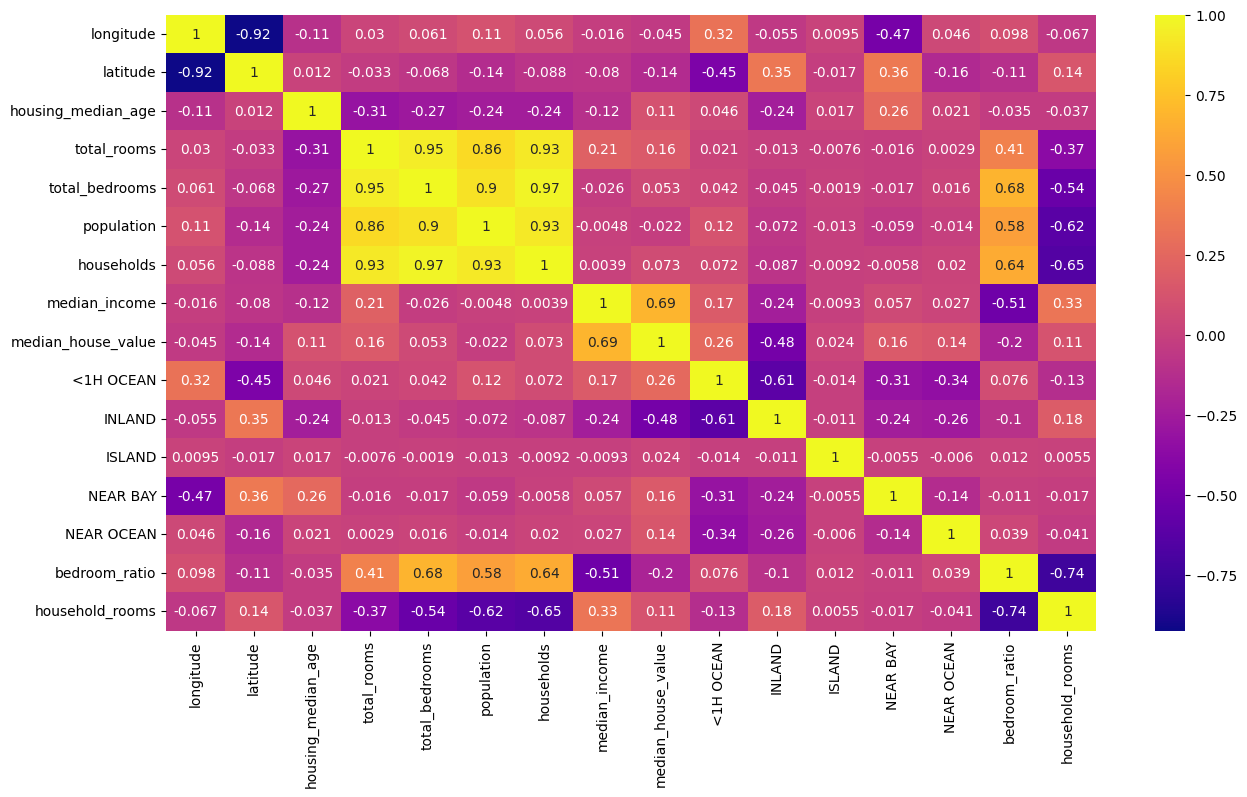

In [47]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

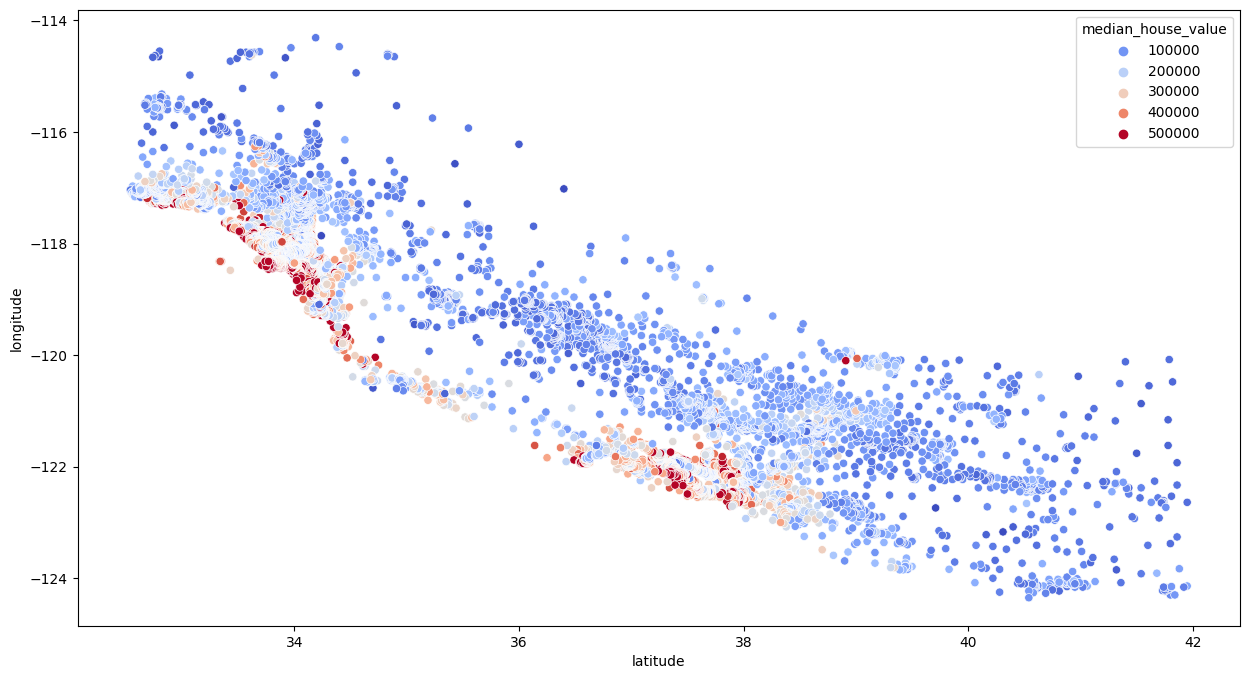

In [44]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'latitude',y='longitude',data=df,hue='median_house_value',palette='coolwarm')
plt.show()

In [45]:
df['bedroom_ratio'] = df['total_bedrooms'] / df['total_rooms']
df['household_rooms'] = df['total_rooms'] / df['households']

In [46]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0,0.762444,1.329892


In [ ]:

for col in df.columns:
    plt.figure(figsize=(10,9))
    sns.boxplot(df[col])
    plt.title(f'Name:{col}')
    plt.show()

In [ ]:
#Now split it into x and y
x = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']

#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selection
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import lightgbm as lgbm
from sklearn.gaussian_process import GaussianProcessRegressor


lr = LinearRegression()
r = Ridge()
l = Lasso()
en = ElasticNet()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
adb = AdaBoostRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
svr = SVR()
cat = CatBoostRegressor()
lgb =lgbm.LGBMRegressor()
gpr = GaussianProcessRegressor()

#Fittings
lr.fit(x_train_scaled,y_train)
r.fit(x_train_scaled,y_train)
l.fit(x_train_scaled,y_train)
en.fit(x_train_scaled,y_train)
rf.fit(x_train_scaled,y_train)
gb.fit(x_train_scaled,y_train)
adb.fit(x_train_scaled,y_train)
xgb.fit(x_train_scaled,y_train)
knn.fit(x_train_scaled,y_train)
svr.fit(x_train_scaled,y_train)
cat.fit(x_train_scaled,y_train)
lgb.fit(x_train_scaled,y_train)
gpr.fit(x_train_scaled,y_train)

In [49]:
#preds
lrpred = lr.predict(x_test_scaled)
rpred = r.predict(x_test_scaled)
lpred = l.predict(x_test_scaled)
enpred = en.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
adbpred = adb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
svrpred = svr.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
gprpred = gpr.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import r2_score,mean_absolute_error
lrr2 = r2_score(y_test,lrpred)
rr2 = r2_score(y_test,rpred)
lr2 = r2_score(y_test,lpred)
enr2 = r2_score(y_test,enpred)
rfr2 = r2_score(y_test,rfpred)
gbr2 = r2_score(y_test,gbpred)
adbr2 = r2_score(y_test,adbpred)
xgbr2 = r2_score(y_test,xgbpred)
knnr2 = r2_score(y_test,knnpred)
svrr2 = r2_score(y_test,svrpred)
catr2 = r2_score(y_test,catpred)
lgbr2 = r2_score(y_test,lgbpred)
gprr2 = r2_score(y_test,gprpred)

print('LINEAR REG ',lrr2)
print('RIDGE ',rr2)
print('LASSO ',lr2)
print('ELASTICNET',enr2)
print('RANDOM FOREST ',rfr2)
print('GB',gbr2)
print('ADABOOST',adbr2)
print('XGB',xgbr2)
print('KNN',knnr2)
print('SVR',svrr2)
print('CAT',catr2)
print('LIGHTGBM',lgbr2)
print('GUASSIAN PROCESS',gprr2)

LINEAR REG  0.6687407117584969
RIDGE  0.6687845346778034
LASSO  0.6687771797170381
ELASTICNET 0.5695244174187519
RANDOM FOREST  0.8206863458099127
GB 0.7690677763887058
ADABOOST 0.4734418575674042
XGB 0.8302966804767888
KNN 0.7315700176215607
SVR -0.04903651278318466
CAT 0.8429473285295416
LIGHTGBM 0.8267985845635839
GUASSIAN PROCESS -10.144343865864508


2nd time preds

LINEAR REG  0.6637593060045579

RIDGE  0.6637581656295152

LASSO  0.6637580486274165

ELASTICNET 0.5026345378196754

RANDOM FOREST  0.8184678635490785

GB 0.767742521039364

ADABOOST 0.4197300569292095

XGB 0.8249674155829618

KNN 0.7287103765123573

SVR -0.05030770420953634

CAT 0.8404907392361907

LIGHTGBM 0.8248701779869948

GUASSIAN PROCESS -85.08005171432413


LINEAR REG  0.6405760152174982

RIDGE  0.6405707573284904

LASSO  0.640573504664433

ELASTICNET 0.4976663571471964

RANDOM FOREST  0.8182092326112532

GB 0.7676932223216073

ADABOOST 0.43103165205456295

XGB 0.8249674155829618

KNN 0.7148235717487059

SVR -0.049605372807280945

CAT 0.8404868972251469

LIGHTGBM 0.8259542213067363

GUASSIAN PROCESS -316.1299699073301
